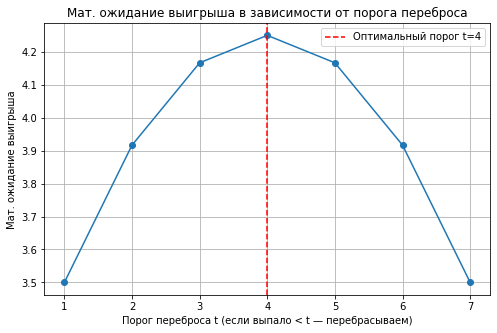

Оптимальная стратегия: перебрасывать, если результат первого броска меньше 4
Максимальное мат. ожидание при этой стратегии: 4.250


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Возможные значения кубика
faces = np.arange(1, 7)
mean_roll = np.mean(faces)

def expected_value(t):
    """
    Мат. ожидание стратегии с порогом t:
    если x < t - перебрасываем,
    иначе принимаем x.
    """
    n = len(faces)
    # сумма выигрыша при x < t: берем 3.5 (мат. ожидание)
    low_part = (t - 1) * mean_roll if t > 1 else 0
    # сумма выигрыша при x >= t: просто сумма x
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / n

thresholds = np.arange(1, 8)
expectations = [expected_value(t) for t in thresholds]

# Найдем оптимальный порог
opt_t = thresholds[np.argmax(expectations)]
opt_val = max(expectations)

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(thresholds, expectations, marker='o')
plt.axvline(opt_t, color='red', linestyle='--', label=f'Оптимальный порог t={opt_t}')
plt.title('Мат. ожидание выигрыша в зависимости от порога переброса')
plt.xlabel('Порог переброса t (если выпало < t — перебрасываем)')
plt.ylabel('Мат. ожидание выигрыша')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

print(f"Оптимальная стратегия: перебрасывать, если результат первого броска меньше {opt_t}")
print(f"Максимальное мат. ожидание при этой стратегии: {opt_val:.3f}")


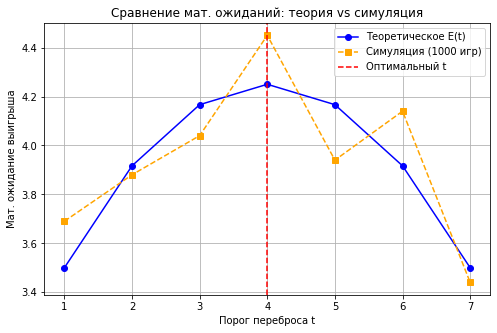

t=1: Симуляция=3.690, Теория=3.500
t=2: Симуляция=3.880, Теория=3.917
t=3: Симуляция=4.040, Теория=4.167
t=4: Симуляция=4.450, Теория=4.250
t=5: Симуляция=3.940, Теория=4.167
t=6: Симуляция=4.140, Теория=3.917
t=7: Симуляция=3.440, Теория=3.500


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # чтобы результаты были воспроизводимыми

N = 100  # количество игр в симуляции
faces = np.arange(1, 7)
mean_roll = np.mean(faces)

def simulate_game(t, trials=N):
    """
    Симуляция игры с порогом t:
    - если первый бросок < t, перебрасываем и берём второй результат
    - иначе берём первый результат
    """
    results = []
    for _ in range(trials):
        first = np.random.randint(1, 7)
        if first < t:
            second = np.random.randint(1, 7)
            results.append(second)
        else:
            results.append(first)
    return np.mean(results)

# Запуск симуляции для всех порогов
thresholds = np.arange(1, 8)
simulated_E = [simulate_game(t) for t in thresholds]

# Теоретические значения для сравнения
def expected_value(t):
    low_part = (t - 1) * mean_roll if t > 1 else 0
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / 6

theoretical_E = [expected_value(t) for t in thresholds]

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(thresholds, theoretical_E, marker='o', label='Теоретическое E(t)', color='blue')
plt.plot(thresholds, simulated_E, marker='s', linestyle='--', label='Симуляция (1000 игр)', color='orange')
plt.axvline(thresholds[np.argmax(theoretical_E)], color='red', linestyle='--', label='Оптимальный t')
plt.title('Сравнение мат. ожиданий: теория vs симуляция')
plt.xlabel('Порог переброса t')
plt.ylabel('Мат. ожидание выигрыша')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

# Вывод в консоль
for t, sim, theo in zip(thresholds, simulated_E, theoretical_E):
    print(f"t={t}: Симуляция={sim:.3f}, Теория={theo:.3f}")


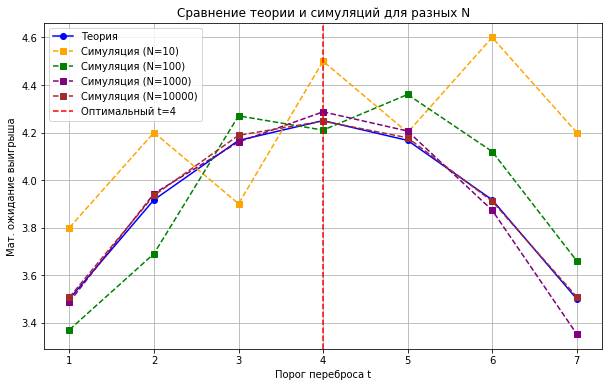

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # фиксируем для воспроизводимости

faces = np.arange(1, 7)
mean_roll = np.mean(faces)

def simulate_game(t, trials):
    results = []
    for _ in range(trials):
        first = np.random.randint(1, 7)
        if first < t:
            second = np.random.randint(1, 7)
            results.append(second)
        else:
            results.append(first)
    return np.mean(results)

def expected_value(t):
    low_part = (t - 1) * mean_roll if t > 1 else 0
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / 6

thresholds = np.arange(1, 8)
theoretical_E = [expected_value(t) for t in thresholds]

# Количества бросков для симуляции
trial_counts = [10, 100, 1000, 10000]
colors = ['orange', 'green', 'purple', 'brown']

plt.figure(figsize=(10,6))

# Теоретическая линия
plt.plot(thresholds, theoretical_E, marker='o', color='blue', label='Теория')

# Симуляции для разных N
for N, color in zip(trial_counts, colors):
    simulated_E = [simulate_game(t, N) for t in thresholds]
    plt.plot(thresholds, simulated_E, marker='s', linestyle='--', color=color, label=f'Симуляция (N={N})')

# Оптимальный порог
opt_t = thresholds[np.argmax(theoretical_E)]
plt.axvline(opt_t, color='red', linestyle='--', label=f'Оптимальный t={opt_t}')

plt.title('Сравнение теории и симуляций для разных N')
plt.xlabel('Порог переброса t')
plt.ylabel('Мат. ожидание выигрыша')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()
